# Project description
You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.

You need to prioritize these hypotheses, launch an A/B test, and analyze the results.


In [1]:
# Loading all the libraries
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
# Loadind data
# Changing 'date' columns type to 'datetime'
visits = pd.read_csv('visits_us.csv',parse_dates=['date'])
orders = pd.read_csv('orders_us.csv', parse_dates=['date'])
hypotheses = pd.read_csv('hypotheses_us.csv',sep=';')

# Data preprocesing

## orders

In [3]:
#data sample
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [4]:
#general info
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [5]:
#How many users?
orders['visitorId'].nunique()

1031

In [6]:
# How many users in each group
orders.groupby(['group']).agg({'visitorId' : 'nunique'}).reset_index()

,group,visitorId
0,A,503
1,B,586


Ther are 1031 users overall and 1089 in the groups, must be some users in both groups!

In [7]:
#finding users that are in both groups
is_duplicates = orders.groupby('visitorId', as_index=False)['group'].nunique().sort_values(by= 'group',ascending=False)
duplicates = is_duplicates[is_duplicates > 1].dropna()
duplicates


,visitorId,group
639,2654030115,2.0
932,3891541246,2.0
950,3941795274,2.0
340,1404934699,2.0
84,351125977,2.0
954,3951559397,2.0
710,2927087541,2.0
958,3963646447,2.0
591,2458001652,2.0
960,3972127743,2.0


In [8]:
#creating dataframe before changes
orders_before = orders.copy()

In [9]:
#getting rid of users that are in both groups
orders = orders[~orders['visitorId'].isin(duplicates['visitorId'])]

In [10]:
# How many users in each group
orders.groupby(['group']).agg({'visitorId' : 'nunique'}).reset_index()

,group,visitorId
0,A,445
1,B,528


In [11]:
#checking test duration
print(orders['date'].min())
print(orders['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00


In [12]:
# cheking for duplicates
print(f"Nuber of duplicates: {orders.duplicated().sum()}")

Nuber of duplicates: 0


### 'Orders' data preprocesing conclusions:
* There is no missing data.


* There aren't any duplicates.


* The duration of the test is 1 month (August 2019).


* There were 68 users in both groups, I got rid of them because they are irelevant to the test.

## visits

In [13]:
#data sample
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
#general info
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [15]:
#checking groups distribution
visits['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

In [16]:
#checking test duration
print(visits['date'].min())
print(visits['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00


In [17]:
# cheking for duplicates
print(f"Nuber of duplicates: {visits.duplicated().sum()}")

Nuber of duplicates: 0


### 'Vsits' data preprocesing conclussions:
* There is no missing data.


* There aren't any duplicates.


* The duration of the test is 1 month (August 2019).


## hypotheses

In [18]:
#data
pd.set_option('display.max_colwidth', None)
display(hypotheses)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [19]:
#general info
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [20]:
# Changing column names to lowercase letter
hypotheses.columns = hypotheses.columns.str.lower()
hypotheses.head(0)

,hypothesis,reach,impact,confidence,effort


### Hypothses data preprocesing conclussions:
* There is no missing data.


* There aren't any duplicates.

# Part 1. Prioritizing Hypotheses

## Aplying 'ICE'


In [21]:
pd.set_option('display.max_colwidth', None)
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']
display(hypotheses[['hypothesis', 'ICE']].sort_values(by=['ICE'], ascending=False))

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


## Aplying 'RICE'


In [22]:
hypotheses['RICE'] = hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence'] / hypotheses['effort']
display(hypotheses[['hypothesis', 'RICE']].sort_values(by=['RICE'], ascending=False))

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


## conclussion
* The difference between the `RICE` and `ICE` methods are the `reach` component. 


* We can see that `first` hypothesys in `RICE` is the `third` on `ICE` and the `first` on `ICE` is the `fifth` on `RICE`.


* Meaning that for example in the first hypothesys on `ICE` even though it has very high impact and confident factors it has a very low reach, probably because we are talking about people's birthdays witch accurs only once per year. And therefore have a low priority on `RICE`.

# Part 2. A/B Test Analysis

## Graph cumulative revenue by group. Make conclusions and conjectures.

In [23]:
visits.head(1)

,date,group,visits
0,2019-08-01,A,719


In [24]:
orders.head(1)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B


In [25]:
# building an array with unique paired date-group values
datesGroups = orders[['date','group']].drop_duplicates()

# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# getting aggregated cumulative daily data on visits  
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visits
0 2019-08-01     A      23      19   2266.6     719
1 2019-08-01     B      17      17    967.2     713
2 2019-08-02     A      42      36   3734.9    1338
3 2019-08-02     B      40      39   3535.3    1294
4 2019-08-03     A      66      60   5550.1    1845


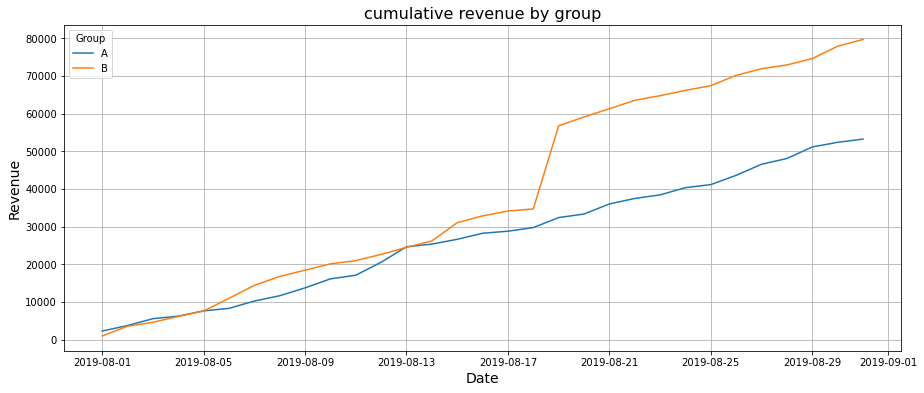

In [26]:

# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

#changing figure size
plt.rcParams["figure.figsize"] = (15,6)
# Plotting the group A revenue graph
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Plotting the group B revenue graph
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('cumulative revenue by group',fontsize =16 )
plt.xlabel('Date', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.legend(title='Group')
plt.grid()

### Graph analysis and conclussions:
* X axis = time in days, Y axis = comulative revenue in Dollars, Blue line = group A, orange line = group B.


*  The revenue is incresing through the whole month, its good.


* The revenue of group `A` has a small spike around the 13th and `B` has a big spike around the 18th of the month, this could imply a jump in the number of orders or very expensive orders.

## Graph cumulative average order size by group. Make conclusions and conjectures.

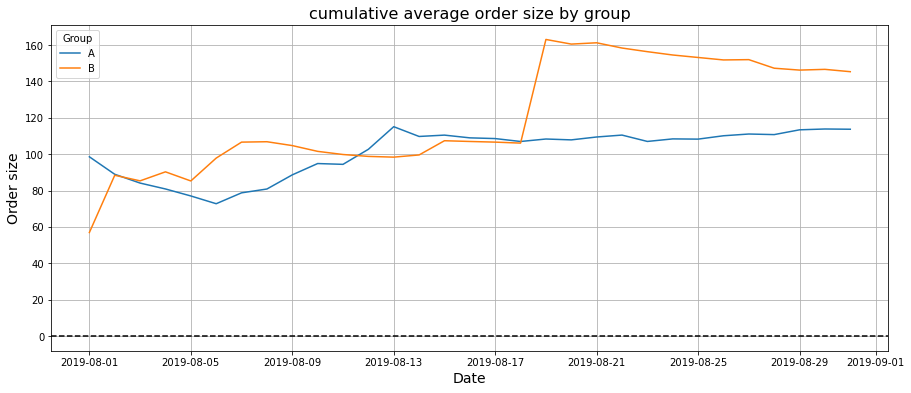

In [27]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('cumulative average order size by group',fontsize =16 )
plt.xlabel('Date', fontsize=14)
plt.ylabel('Order size', fontsize=14)
plt.legend(title='Group')
plt.grid()
plt.axhline(y=0, color='black', linestyle='--',label='Y=0')


### Graph analysis and conclussions:
* X axis = time in days, Y axis = comulative average order size in Dollars, Blue line = group A, orange line = group B.



*  Group A has a peak around the 13th it explains the peak in the previous graph, it may be due to large expansive orders. After it it stabilize and go up in the end.


* Group B start with a surge and stablize and after has another peak (big surge) around the 18th, it explains the peak in the previous graph, it may be due to large expansive orders. After it it stabilize but stat declining.


## Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

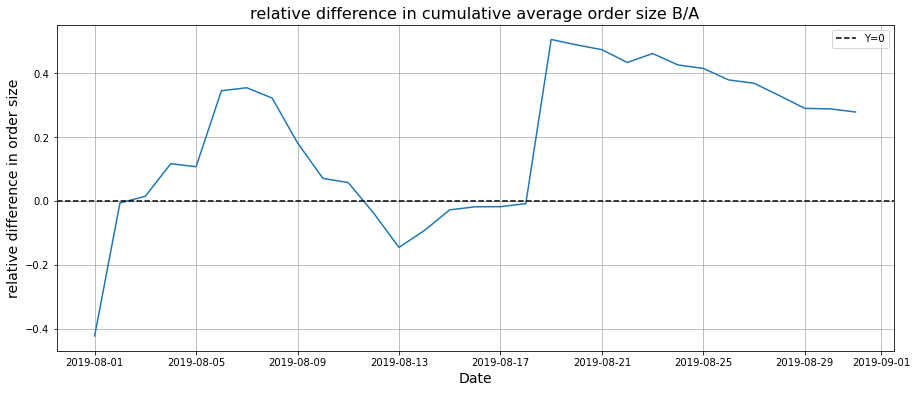

In [28]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--',label='Y=0')
# ploting titles
plt.title('relative difference in cumulative average order size B/A',fontsize =16 )
plt.xlabel('Date', fontsize=14)
plt.ylabel('relative difference in order size', fontsize=14)
plt.legend()
plt.grid()


### Graph analysis and conclussions:
* X axis = time in days, Y axis = relative difference in order size (B/A), dashed line = 0 relative difference (Y=0).


* As expected we see spikes of the difference at several points (same points we saw before). it means there are some very big orders and outliers.

## Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

In [29]:
# calculating cumulative conversion
cumulativeData['conversion'] = (cumulativeData['orders']/cumulativeData['visits'])
cumulativeData.head()

,date,group,orders,buyers,revenue,visits,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,42,36,3734.9,1338,0.031390
3,2019-08-02,B,40,39,3535.3,1294,0.030912
4,2019-08-03,A,66,60,5550.1,1845,0.035772


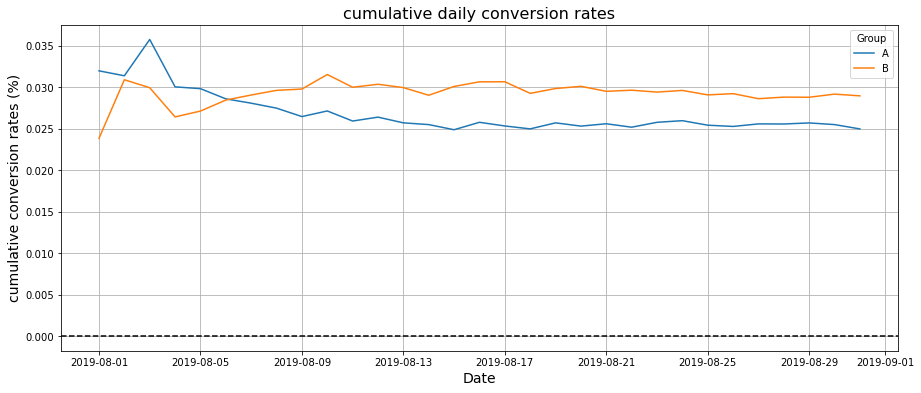

In [30]:
# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend(title = 'Group')
plt.title('cumulative daily conversion rates',fontsize =16 )
plt.xlabel('Date', fontsize=14)
plt.ylabel('cumulative conversion rates (%)', fontsize=14)
plt.axhline(y=0, color='black', linestyle='--',label='Y=0')
plt.grid()


### Graph analysis

* X axis = time in days, Y axis = cumulative conversion rates percentage, Blue line = group A, orange line = group B.


* Group A covertion starts around 3.2% jumps to 3.6% and then drops to 2.5% and stabilize there.


* Group B climbs to 3.1% and then drops and climb again until it stbilize around 2.9%.

No handles with labels found to put in legend.


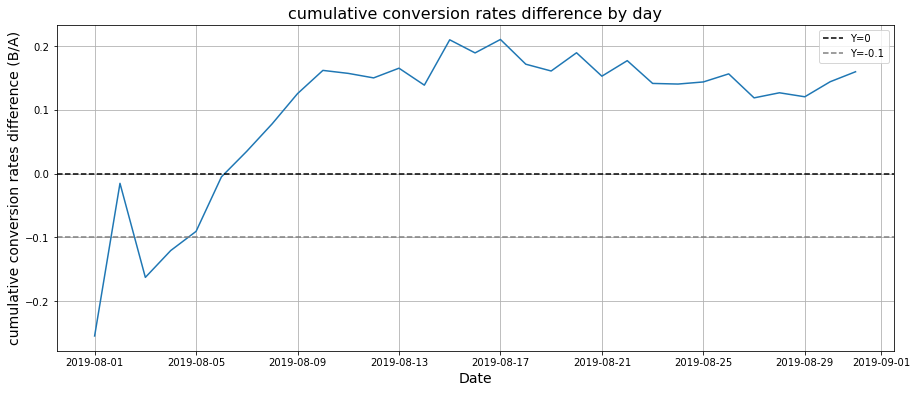

In [31]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--', label='Y=0')
plt.axhline(y=-0.1, color='grey', linestyle='--', label='Y=-0.1')
plt.legend()
plt.title('cumulative conversion rates difference by day',fontsize =16 )
plt.xlabel('Date', fontsize=14)
plt.ylabel('cumulative conversion rates difference (B/A)', fontsize=14)
plt.grid()

### Graph analysis and conclusions:


* At the beginig of the test group A was ahed but after a week group B took ahed by 0.2%.


* It may seem like group B is better at this point but we need to look for anomalies.

## Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [32]:
orders.head(1)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B


In [33]:
# making table for number of orders per user
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


Text(0.5, 1.0, 'Number of orders per user')

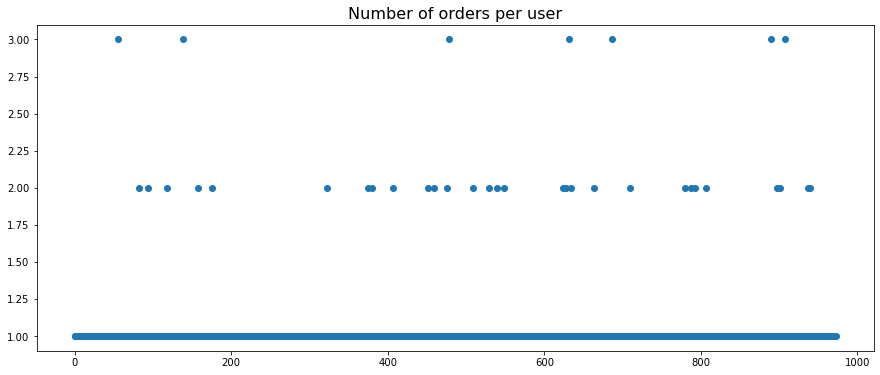

In [34]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Number of orders per user',fontsize =16 )

### Conclussions:

* Most of the users made one order, some made 2 and vey litle made 3. we can't know yet if they are outliers.

## Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [35]:
print(np.percentile(ordersByUsers['orders'], [ 95, 99]))

[1. 2.]


In [36]:
orders_point = 1 

### conclussion:

* only 5% of the users made more than 1 order, and only 1% of the users made more than 2 orders.


* I will set 1 order per user as the threshhold for normal data.

## Plot a scatter chart of order prices. Make conclusions and conjectures

Text(0.5, 1.0, 'Order prices')

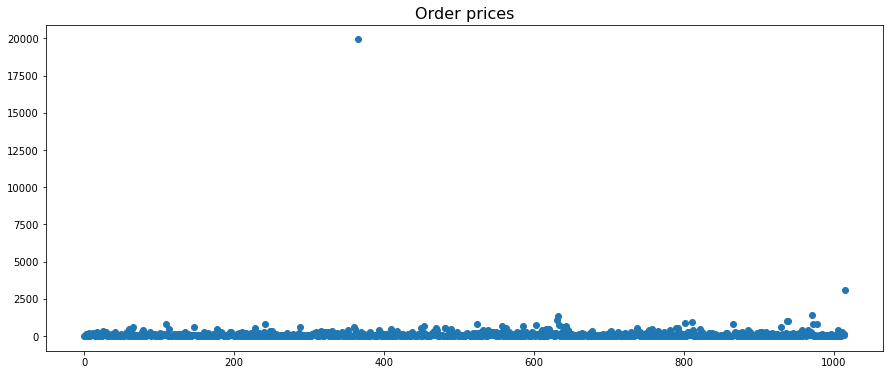

In [37]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Order prices',fontsize =16 )

In [38]:
#creating datra set without extrim revenue outliers
no_outliers_rev = orders[orders['revenue'] < 5000]

Text(0.5, 1.0, 'Order prices')

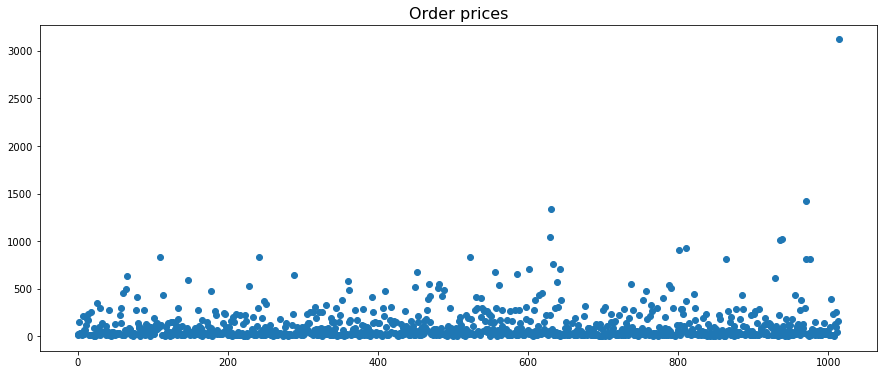

In [39]:
# ploting new scatter plot withput outliers
x_values = pd.Series(range(0, len(no_outliers_rev['revenue'])))
plt.scatter(x_values, no_outliers_rev['revenue'])
plt.title('Order prices',fontsize =16 )

### conclussion:
* the majority of the orders are less than 1000 Dollars, there is one huge order (20000) that pulls everything up. defenetly an outlier.

## Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [40]:
revenue_point = np.percentile(orders['revenue'], 95)
revenue_point

414.275

### conclussion:

* 5% of the orders are more expensive than 414 Dollars.


* 1% of the orders are more expensive than 830 Dollars.


* The point that define anomaly is: 414.275 Dollars

## Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

In [41]:
orders.head(0)

,transactionId,visitorId,date,revenue,group


In [42]:
visits.head(5)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [43]:
# creating orders by user data frames for each group
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

#creating groups for the test
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)



In [44]:
#creating shpiro-wilk test function to check normal distribution
def is_normal_dist(sample1,sample2,alpha=0.05):
    sample1=sample1.dropna()
    sample2=sample2.dropna()
    p1_norm=stats.shapiro(sample1)[1]
    p2_norm=stats.shapiro(sample2)[1]
    if p1_norm > alpha and p2_norm>alpha:
        print('Both normal, execute T-test')
    else:
        print('One or more samples are not normal, execute mann-whtney-u test')

### Hypotheses for normality test
* H0 = the sample is normally distributed.
* H1 = the sample is not distributed normally. 
* alpha = 0.05
* I chose significant level of 95%.

In [45]:
#Testing for normality
is_normal_dist(sampleA,sampleB)

One or more samples are not normal, execute mann-whtney-u test


C:\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [46]:
#creating man-whitney non-parametric test function
def wilcoxon_test(sample1,sample2,alpha=0.05):
    sample1=sample1.dropna()
    sample2=sample2.dropna()
    statist, p_value=stats.mannwhitneyu(sample1, sample2)
    print(f'P-value: {p_value:.3f}')
    if p_value<alpha:
        print('Reject H0, there is a significant differnce between the groups')
    else:
        print('Fail to Reject H0, there is no significant differnce between the groups')
    
    print(f"The relative differnce (B/A) is :{sample2.mean()/sample1.mean()-1:.3f}")
    

### Hypotheses for mann whitney test
* H0 = The group are equal to each other.
* H1 = The group are different from each other. 
* alpha = 0.05
* I chose significant level of 95%.

In [47]:
#Testing mann_whitney
wilcoxon_test(sampleA,sampleB)

P-value: 0.011
Reject H0, there is a significant differnce between the groups
The relative differnce (B/A) is :0.160


### Conclussions:

* The groups did not distributed normally therefore I had to use non parametric test.
* The conversion rate of group `B` is significantly `higher` than group `A` (by 16%).

## Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

In [48]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


### Hypotheses for normality test
* H0 = the sample is normally distributed.
* H1 = the sample is not distributed normally. 
* alpha = 0.05
* I chose significant level of 95%.

In [49]:
#Testing for normality
is_normal_dist(orders[orders['group']=='A']['revenue'],orders[orders['group']=='B']['revenue'])

One or more samples are not normal, execute mann-whtney-u test


### Hypotheses for mann whitney test
* H0 = The group are equal to each other.
* H1 = The group are different from each other. 
* alpha = 0.05
* I chose significant level of 95%.

In [50]:
#Testing mann_whitney
wilcoxon_test(orders[orders['group']=='A']['revenue'],orders[orders['group']=='B']['revenue'])

P-value: 0.862
Fail to Reject H0, there is no significant differnce between the groups
The relative differnce (B/A) is :0.278


## conclussions:

* There is no statisticaly significant differnce in the `average order size` between the groups.
* based on those tests, the test is succesful and groop B is better!
* waiting for further analysis...

## Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

In [51]:
# Finding abnormal users:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > orders_point]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_point]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(f'Number of abnormal users: {len(abnormalUsers)}')

568     113298937
1099    148427295
928     204675465
684     358944393
36      366673373
Name: visitorId, dtype: int64
Number of abnormal users: 68


In [52]:
#Creating filtered data
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [53]:
# Applying mann_whitney test to the filltered data (it is still not normaly distributed!)
wilcoxon_test(sampleAFiltered,sampleBFiltered)

P-value: 0.003
Reject H0, there is a significant differnce between the groups
The relative differnce (B/A) is :0.265


### Conclussion:

* There is still a significant difference in conversion between the groups.


* The relative difference in converssion grew from 16% to 28.6% after filtering abnormal users.


## Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

In [54]:
#creating filterd data
sampA =orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']
sampB =orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']

In [55]:
# mann-whitney test:
wilcoxon_test(sampA, sampB)

P-value: 0.889
Fail to Reject H0, there is no significant differnce between the groups
The relative differnce (B/A) is :-0.030


### conclussions:
* The filtered data has the same test result as the unfilterd, there is no difference in average order size between groups.

## Make a decision based on the test results.

* The conversion rate of group B is significantly higher then group A! the comulative conversion graph is supporting this as well.


* The average order size of the two groups is simillar (has no significant differnce). In the graph we can see that if the test will continue the order sizes will become even more close!

* If the order size is the same but the conversion rate is higher in `B` then it means that group `B` is more profitable because more visitors will become buyers with the same order size!


* Based on these facts my decision is to stop the test and declare Group `B` as the leader.